Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2613 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1068 - accuracy: 0.9664
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9705
0.9704999923706055
0.09227921068668365
1/1 [==============================] - 0s 139ms/step
----------------
The predicted value is :  3
----------------


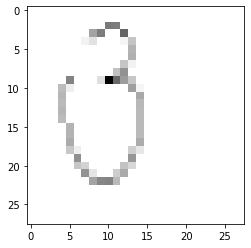

1/1 [==============================] - 0s 54ms/step
----------------
The predicted value is :  9
----------------


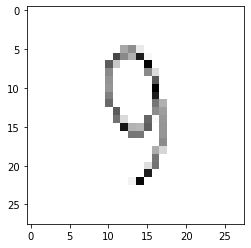

1/1 [==============================] - 0s 23ms/step
----------------
The predicted value is :  3
----------------


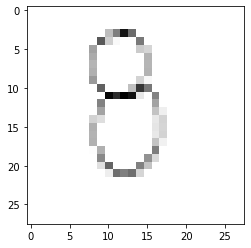

1/1 [==============================] - 0s 143ms/step
----------------
The predicted value is :  8
----------------


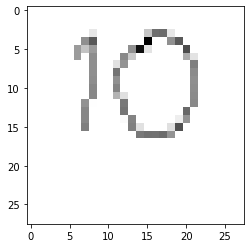

In [1]:
from os import access
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2 as cv  
import matplotlib.pyplot as plt
from tensorflow.python.keras.metrics import accuracy
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test)=mnist.load_data()# spliting the data in training set as tuple

x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

loss , accuracy  =model.evaluate(x_test,y_test)
print(accuracy)
print(loss)



for x in range(1,5):

    img=cv.imread(f'{x}.png')[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print("----------------")
    print("The predicted value is : ",np.argmax(prediction))
    print("----------------")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()